In [1]:
import tensorflow as tf
import librosa
import pandas as pd
import numpy as np
import sklearn
import os
from keras.callbacks import TensorBoard
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from warnings import filterwarnings
filterwarnings("ignore")

D:\Anaconda\lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated
  "class": algorithms.Blowfish,


In [2]:
def eventroll_to_multihot_vector(eventroll):
  active_events = (eventroll.sum(axis=1) >= 0.5).astype('float')
  multi_hot = np.delete(active_events, 8)
  return multi_hot

In [3]:
path = "C:\\Users\\Manan Kabra\\Desktop\\Sem5\\EE603A\\Y"
os.chdir(path)
Y_list = os.listdir()
print(len(Y_list))

10000


In [4]:
Y_hot = []
for i in range(len(Y_list)):
  Y_mat = np.load(Y_list[i])
  multi_hot = eventroll_to_multihot_vector(Y_mat)
  Y_hot.append(multi_hot)
print(len(Y_hot))

10000


In [5]:
path = "C:\\Users\\Manan Kabra\\Desktop\\Sem5\\EE603A\\X"
os.chdir(path)
X_list = os.listdir()
print(len(X_list))

10000


In [6]:
X_input = []
for i in range(len(X_list)):
  X_mat = np.load(X_list[i])
  X_mat = librosa.power_to_db(X_mat, ref = np.max)
  X_input.append(X_mat)
  X_input[i] = tf.convert_to_tensor(X_input[i])
print(len(X_input))

10000


In [7]:
path = 'C:\\Users\\Manan Kabra\\Desktop\\Sem5\\EE603A\\dataset\\Y'
os.chdir(path)
Yval_list = os.listdir()
print(len(Yval_list))

2000


In [8]:
Yval_hot = []
for i in range(len(Yval_list)):
  Y_mat = np.load(Yval_list[i])
  multi_hot = eventroll_to_multihot_vector(Y_mat)
  Yval_hot.append(multi_hot)
print(len(Yval_hot))

2000


In [9]:
path = 'C:\\Users\\Manan Kabra\\Desktop\\Sem5\\EE603A\\dataset\\X'
os.chdir(path)
Xval_list = os.listdir()
print(len(Xval_list))

2000


In [10]:
Xval_input = []
for i in range(len(Xval_list)):
  X_mat = np.load(Xval_list[i])
  X_mat = librosa.power_to_db(X_mat, ref = np.max)
  Xval_input.append(X_mat)
  Xval_input[i] = tf.convert_to_tensor(Xval_input[i])
print(len(Xval_input))

2000


In [11]:
X_train = X_input
Y_train = Y_hot
X_test = Xval_input
Y_test = Yval_hot

In [12]:
X_train = tf.convert_to_tensor(X_train)
X_test = tf.convert_to_tensor(X_test)
Y_train = np.array(Y_train)
Y_test = np.array(Y_test)

In [13]:
Y_train = Y_train/(Y_train.sum(axis = 1, keepdims = True))
Y_test = Y_test/(Y_test.sum(axis = 1, keepdims = True))

In [14]:
print(type(Y_test), type(Y_train))
print(type(X_test), type(X_train))

<class 'numpy.ndarray'> <class 'numpy.ndarray'>
<class 'tensorflow.python.framework.ops.EagerTensor'> <class 'tensorflow.python.framework.ops.EagerTensor'>


In [15]:
print(len(Y_test), len(X_test), len(Y_train), len(X_train))

2000 2000 10000 10000


In [16]:
print(X_test.shape, Y_test.shape, X_train.shape, Y_train.shape)

(2000, 1, 64, 1000) (2000, 10) (10000, 1, 64, 1000) (10000, 10)


In [17]:
from keras.callbacks import ModelCheckpoint
model_path = 'C:\\Users\\Manan Kabra\\Desktop\\Sem5\\EE603A\\200552_Assignment2\\Best_Models\\new_best_models_dnn.{epoch:02d}-{val_loss:.3f}.hdf5'
checkpoint = tf.keras.callbacks.ModelCheckpoint(filepath = model_path, monitor = 'val_accuracy', save_best_only = True, mode = 'max')

In [28]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(100,activation='relu'),
    tf.keras.layers.Dense(10,activation='relu'),
    tf.keras.layers.Dense(1,activation='relu'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(10, activation='softmax')
  ])
model

In [29]:
model.compile(optimizer=tf.keras.optimizers.Adam(),
            loss=tf.keras.losses.CategoricalCrossentropy(),
            metrics=["accuracy"])
model.build((None,1,64,1000))
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_13 (Dense)            (None, 1, 64, 100)        100100    
                                                                 
 dense_14 (Dense)            (None, 1, 64, 10)         1010      
                                                                 
 dense_15 (Dense)            (None, 1, 64, 1)          11        
                                                                 
 flatten_3 (Flatten)         (None, 64)                0         
                                                                 
 dense_16 (Dense)            (None, 10)                650       
                                                                 
Total params: 101,771
Trainable params: 101,771
Non-trainable params: 0
_________________________________________________________________


In [30]:
history = model.fit(X_train, Y_train, validation_data = (X_test, Y_test),  batch_size=50, epochs=20, verbose = 1, callbacks = [checkpoint])

Epoch 1/20
200/200 [==============================] - 5s 23ms/step - loss: 2.2440 - accuracy: 0.1121 - val_loss: 2.2386 - val_accuracy: 0.0480
Epoch 2/20
200/200 [==============================] - 5s 23ms/step - loss: 2.1404 - accuracy: 0.1125 - val_loss: 2.1934 - val_accuracy: 0.0480
Epoch 3/20
200/200 [==============================] - 4s 22ms/step - loss: 2.0594 - accuracy: 0.1125 - val_loss: 2.1661 - val_accuracy: 0.0480
Epoch 4/20
200/200 [==============================] - 4s 22ms/step - loss: 2.0006 - accuracy: 0.1125 - val_loss: 2.1544 - val_accuracy: 0.0480
Epoch 5/20
200/200 [==============================] - 4s 22ms/step - loss: 1.9614 - accuracy: 0.1125 - val_loss: 2.1540 - val_accuracy: 0.0480
Epoch 6/20
200/200 [==============================] - 4s 22ms/step - loss: 1.9377 - accuracy: 0.1125 - val_loss: 2.1606 - val_accuracy: 0.0480
Epoch 7/20
200/200 [==============================] - 4s 22ms/step - loss: 1.9246 - accuracy: 0.1125 - val_loss: 2.1695 - val_accuracy: 0.0480

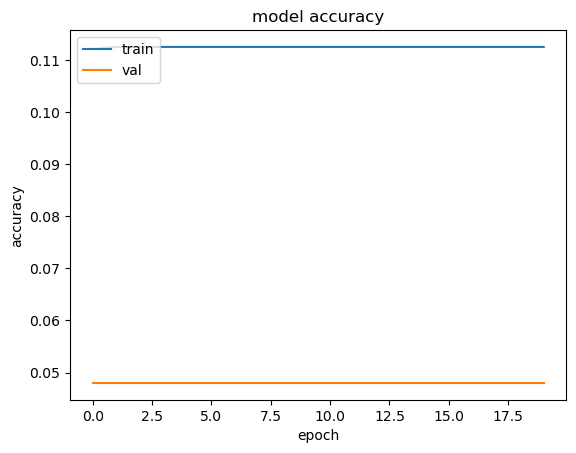

In [31]:
from matplotlib import pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

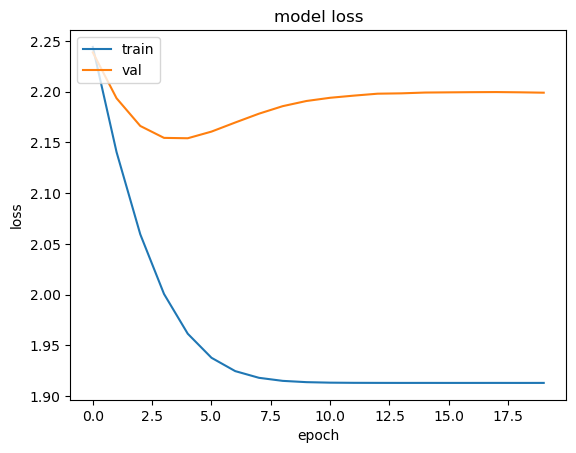

In [32]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [88]:
model = tf.keras.models.load_model('C:\\Users\\Manan Kabra\\Desktop\\Sem5\\EE603A\\200552_Assignment2\\Best_Models\\new_best_models_dnn.01-2.208.hdf5', compile = True, options = None)

In [37]:
path = 'C:\\Users\\Manan Kabra\\Desktop\\Sem5\\EE603A\\test\\X'
os.chdir(path)
X_final_list = os.listdir()
print(len(X_final_list))

2500


In [42]:
X_final_test = []
for i in range(len(X_final_list)):
  X_mat = np.load(X_final_list[i])
  a, b, c = X_mat.shape
  X_mat = librosa.power_to_db(X_mat, ref = np.max)
  X_final_test.append(X_mat)
  X_final_test[i] = tf.convert_to_tensor(X_final_test[i])
print(len(X_final_test))

2500


In [43]:
X_final_test = tf.convert_to_tensor(X_final_test)

In [44]:
print(len(X_final_test), type(X_final_test))

2500 <class 'tensorflow.python.framework.ops.EagerTensor'>


In [45]:
Y_pred = model.predict(X_final_test)

79/79 [==============================] - 1s 11ms/step


In [46]:
path = 'C:\\Users\\Manan Kabra\\Desktop\\Sem5\\EE603A\\200552_Assignment2'
os.chdir(path)
DF = pd.DataFrame(Y_pred)
DF.to_csv("Assignment2_dnndata_before_threshold")

In [47]:
threshold_val = 0.162475
Y_pred[Y_pred < threshold_val] = 0
Y_pred[Y_pred >= threshold_val] = 1
Y_pred = np.array(Y_pred)

In [48]:
path = 'C:\\Users\\Manan Kabra\\Desktop\\Sem5\\EE603A\\200552_Assignment2'
os.chdir(path)
DF = pd.DataFrame(Y_pred)
DF.to_csv("Assignment2_cnndata_after_threshold")

In [35]:
Y_test[Y_test >= 0.1] = 1

In [36]:
from sklearn.metrics import classification_report
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       392
           1       0.00      0.00      0.00       436
           2       0.00      0.00      0.00       274
           3       0.00      0.00      0.00       444
           4       0.00      0.00      0.00       306
           5       0.00      0.00      0.00       221
           6       0.00      0.00      0.00       130
           7       0.00      0.00      0.00       143
           8       0.62      1.00      0.77      1246
           9       0.00      0.00      0.00       151

   micro avg       0.62      0.33      0.43      3743
   macro avg       0.06      0.10      0.08      3743
weighted avg       0.21      0.33      0.26      3743
 samples avg       0.62      0.29      0.39      3743



In [ ]:
from sklearn.metrics import multilabel_confusion_matrix
multilabel_confusion_matrix(Y_test, Y_pred)

In [90]:
correct = 0
total = 0
for i in range(len(Y_pred)):
  for j in range(len(Y_pred[i])):
    if(Y_test[i][j] == 1):
      total += 1   
      if(Y_pred[i][j] == 1):
        correct += 1
accuracy = correct/total
print(accuracy)

0.33288805770772106


In [91]:
TP = 0
TN = 0
FP = 0
FN = 0
for i in range(len(Y_pred)):
  for j in range(len(Y_pred[i])):
    if(Y_test[i][j] == 1 and Y_pred[i][j] == 1):
      TP += 1
    elif(Y_test[i][j] == 0 and Y_pred[i][j] == 1):
      FP += 1
    elif(Y_test[i][j] == 1 and Y_pred[i][j] == 0):
      FN += 1
    elif(Y_test[i][j] == 0 and Y_pred[i][j] == 0):
      TN += 1
print(TP, FP, FN, TN)

1246 754 2497 15503


In [92]:
precision = TP/(TP + FP)
recall = TP/(TP + FN)
f1_score = (2*(precision)*(recall))/(precision + recall)
print("Precision = ", precision)
print("Recall = ", recall)
print("F1 score = ", f1_score)

Precision =  0.623
Recall =  0.33288805770772106
F1 score =  0.4339195542399442
